<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
def find_corners(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    # find Harris corners
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    dst = cv2.dilate(dst,None)
    ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)
    
    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)
    
    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
    
    return corners

In [3]:
def ft0(image):
    return image.size
# Returns the pixel size of the image
def ft1(image):
    return np.mean(image[:,:,0])
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return np.mean(image[:,:,1])
# Returns the average of the green-channel pictures for the images
def ft3(image):
    return np.mean(image[:,:,2])
# Returns the average of the blue-channel pictures for the images
def ft4(image):
    return image.shape[1]/image.shape[0];
def ft5(image):
    corners = find_corners(image)
    return np.mean(corners[:,0] / image.shape[1])
def ft6(image):
    corners = find_corners(image)
    return np.mean(corners[:,1] / image.shape[0])
def ft7(image):
    corners = find_corners(image)
    return np.var(corners[:,0] / image.shape[1])
def ft8(image):
    corners = find_corners(image)
    return np.var(corners[:,1] / image.shape[0])
def ft9(image):
    corners = find_corners(image)
    return corners.shape[0]
def ft10(image):
    corners = find_corners(image)
    clusters = kmeans(corners)
    return 
# def ft5()
#Returns the aspect ratio of the image

In [4]:
# Load in data
starting_data = pd.read_hdf('starting_data.h5')

In [5]:
# For info
data_file_path = file_path = os.path.join(os.getcwd(), 'data','20_categories_training')
folders = os.listdir(data_file_path)
folders.sort()
folders = filter(lambda folder: not folder.startswith('.'), folders)
categories = [dir_name for dir_name in folders]
print(categories)

['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']


In [6]:
# Identify images that are not correctly formatted
bool_index = [len(np.shape(image))!=3 for image in starting_data['image']]
remove_index = starting_data.loc[bool_index].index.tolist()
# starting_data.drop(remove_index, inplace=True)

# mapping 1 color channel images to 3 color channels
def expand_1_channel(image):
    if len(image.shape) == 3:
        return image
    return np.repeat(np.expand_dims(image, axis=2), 3, axis=2)
starting_data['image'] = starting_data['image'].apply(expand_1_channel)

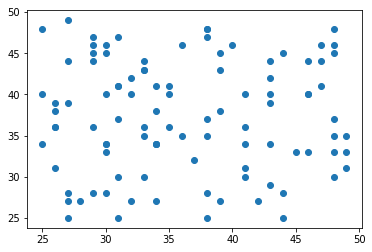

In [29]:
def kmeans(corners):
    k = 10
    corners = np.float32(corners)
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _, labels, centers = cv2.kmeans(
        corners, 
        k, 
        None, 
        criteria=criteria, 
        attempts=10, 
        flags=cv2.KMEANS_RANDOM_CENTERS
    )
    return centers.reshape((-1,1))

# points = np.random.normal(size=(100,2))
points = np.random.randint(25,50,(100,2))
#points = np.float32(points)
#plt.scatter(points[:,0], points[:,1])

#centers = kmeans(points)
#for center in centers:
#    plt.plot(center[0], center[1], 'ro')
#plt.show()

Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

<h4> Graphs </h4>

In [34]:
# Exploration of data!

# Examining trends in average color channel

# Compute the average red-channel for each image
starting_data['red_average'] = pd.Series([ft1(image) for image in starting_data['image']])

# Compute the average green-channel for each image
starting_data['gr# a = starting_data.loc[0, 'image'][:,:,0]
# print(a.shape)
een_average'] = pd.Series([ft2(image) for image in starting_data['image']])

# Compute the average blue-channel for each image
starting_data['blue_average'] = pd.Series([ft3(image) for image in starting_data['image']])

In [35]:
# Reorganize color variable into hue column
starting_data_colored = starting_data.copy()
if not 'new_index' in starting_data_colored:
    starting_data_colored.reset_index(inplace=True)
    starting_data_colored.rename(columns={'index':'new_index'}, inplace=True)

starting_data_colored = pd.melt(starting_data, id_vars=['new_index', 'image', 'label'],
                               value_vars=['red_average', 'green_average', 'blue_average'])
starting_data_colored.rename(columns={'variable':'color'}, inplace=True)

/home/chriscorrea14/miniconda2/envs/data100/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


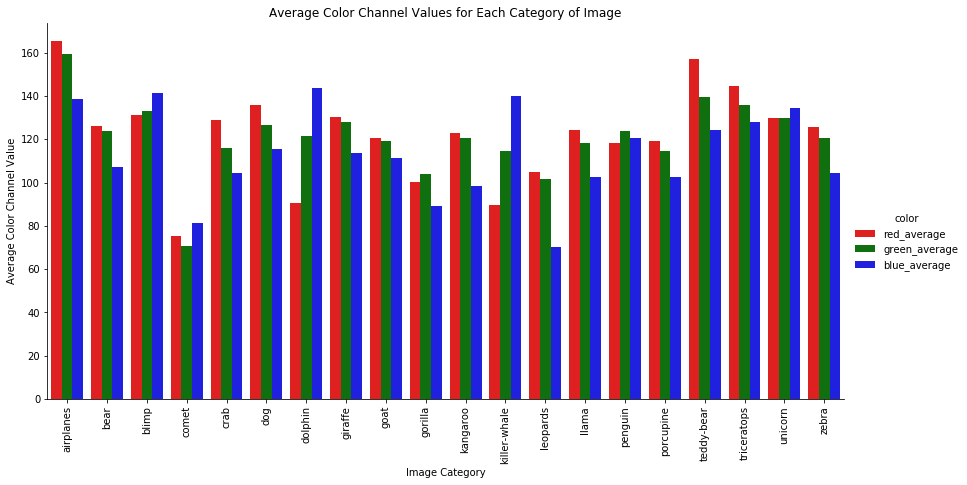

In [47]:
#sns.barplot(starting_data.groupby(['label']).mean().reset_index()['label'],
#           starting_data.groupby(['label']).mean()['red_average'])
#plt.xticks(np.arange(0,20), categories[2:], rotation=90)

plt.figure(figsize=[12,12])
sns.catplot(x='label', y='value', hue='color', data=starting_data_colored,
            kind='bar', palette=['r','g','b'], height=6, aspect=2, ci=None)
plt.xticks(np.arange(0,20), categories, rotation=90)
plt.xlabel('Image Category')
plt.ylabel('Average Color Channel Value')
plt.title('Average Color Channel Values for Each Category of Image');

In [39]:
# Exploration of data!

# Compute the aspect ratio
starting_data['aspect_ratio'] = pd.Series([ft4(image) for image in starting_data['image']])

Text(0.5,1,'Average Aspect Ratio for Each Category of Image')

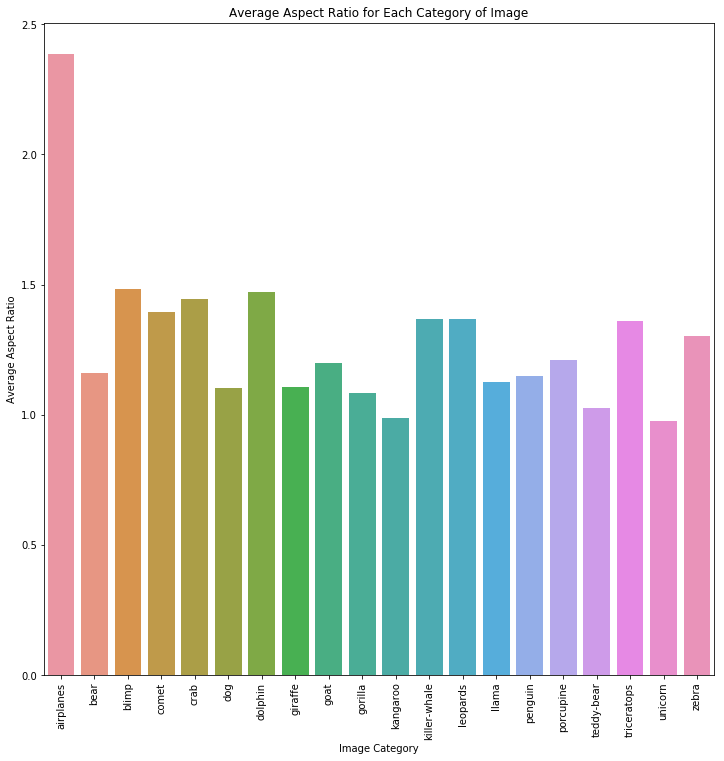

In [48]:
plt.figure(figsize=[12,12])
sns.barplot(x=starting_data.groupby(['label']).mean().reset_index()['label'],
            y=starting_data.groupby(['label']).mean()['aspect_ratio'])
plt.xlabel('Image Category')
plt.xticks(np.arange(0,20), categories, rotation=90)
plt.ylabel('Average Aspect Ratio')
plt.title('Average Aspect Ratio for Each Category of Image')

In [41]:
# Exploration of data!

# Determine the image size
starting_data['image_size'] = pd.Series([ft0(image) for image in starting_data['image']])

Text(0.5,1,'Average Image Size for Each Category of Image')

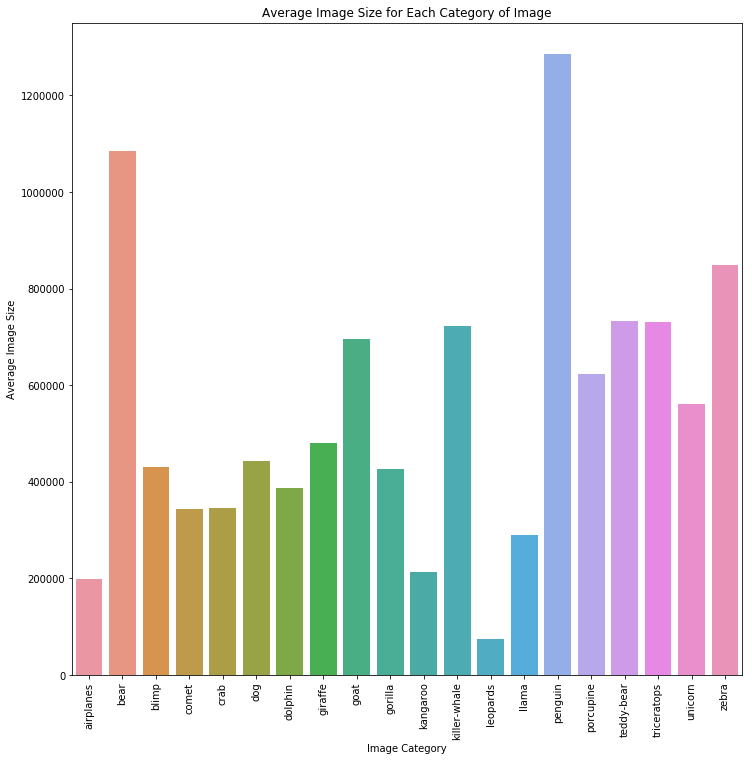

In [50]:
plt.figure(figsize=[12,12])
sns.barplot(x=starting_data.groupby(['label']).mean().reset_index()['label'],
            y=starting_data.groupby(['label']).mean()['image_size'])
plt.xticks(np.arange(0,20), categories, rotation=90)
plt.xlabel('Image Category')
plt.ylabel('Average Image Size')
plt.title('Average Image Size for Each Category of Image')

In [7]:
# Exploration of data!

# Define the corner features
# Mean normalized position of corners
starting_data['corners_avg_x'] = pd.Series([ft5(image) for image in starting_data['image']])
starting_data['corners_avg_y'] = pd.Series([ft6(image) for image in starting_data['image']])

# Variance of normalized position of corners
starting_data['corners_var_x'] = pd.Series([ft7(image) for image in starting_data['image']])
starting_data['corners_var_y'] = pd.Series([ft8(image) for image in starting_data['image']])

# Number of corners
starting_data['corners_num'] = pd.Series([ft9(image) for image in starting_data['image']])


In [12]:
starting_data['label']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1471    19
1472    19
1473    19
1474    19
1475    19
1476    19
1477    19
1478    19
1479    19
1480    19
1481    19
1482    19
1483    19
1484    19
1485    19
1486    19
1487    19
1488    19
1489    19
1490    19
1491    19
1492    19
1493    19
1494    19
1495    19
1496    19
1497    19
1498    19
1499    19
1500    19
Name: label, Length: 1501, dtype: object

In [17]:
starting_data.head()

,image,label,corners_avg_x,corners_avg_y,corners_var_x,corners_var_y,corners_num
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,0.563561,0.540621,0.061394,0.024742,71
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,0.547861,0.540856,0.043255,0.019139,38
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,0.485925,0.527792,0.051072,0.034862,82
3,"[[[174, 190, 187], [173, 189, 186], [172, 188,...",0,0.443575,0.442804,0.059753,0.038761,126
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0,0.479493,0.390340,0.046278,0.066373,93


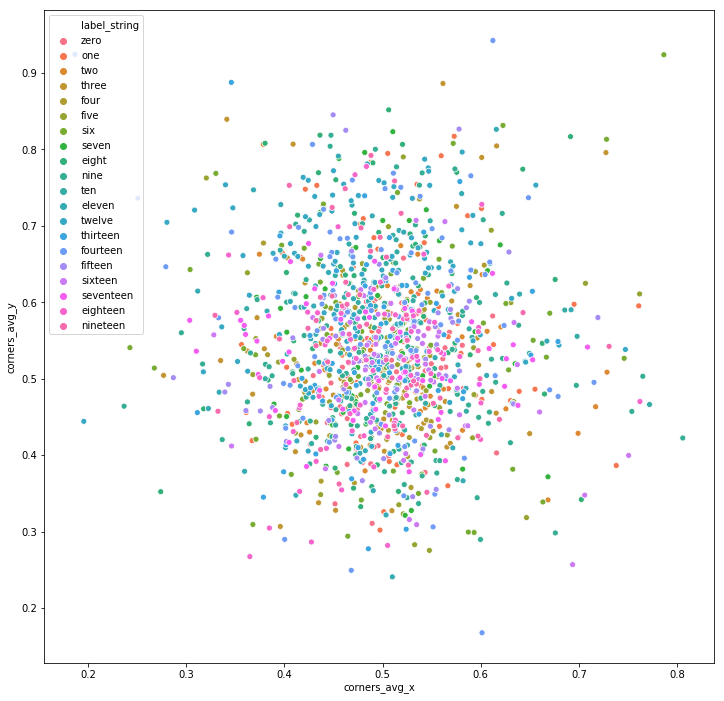

In [25]:
plt.figure(figsize=[12,12])
label_dict = {0: 'zero', 1: 'one', 2: 'two', 3: 'three', 4: 'four', 5: 'five', 6: 'six', 7: 'seven', 8: 'eight', 
             9: 'nine', 10: 'ten', 11: 'eleven', 12: 'twelve', 13: 'thirteen', 14: 'fourteen', 15: 'fifteen', 
             16: 'sixteen', 17: 'seventeen', 18: 'eighteen', 19: 'nineteen'}
starting_data['label_string'] = starting_data['label'].map(label_dict)
sns.scatterplot(x='corners_avg_x', y='corners_avg_y', data=starting_data, hue='label_string')

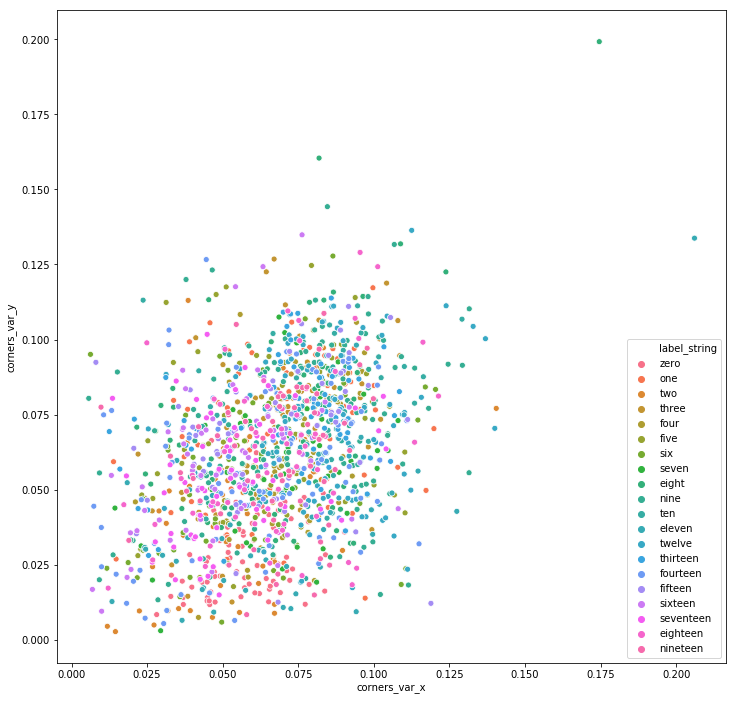

In [26]:
plt.figure(figsize=[12,12])
sns.scatterplot(x='corners_var_x', y='corners_var_y', data=starting_data, hue='label_string')

([<matplotlib.axis.XTick at 0x14f0420fa90>,
 <a list of 20 Text xticklabel objects>)

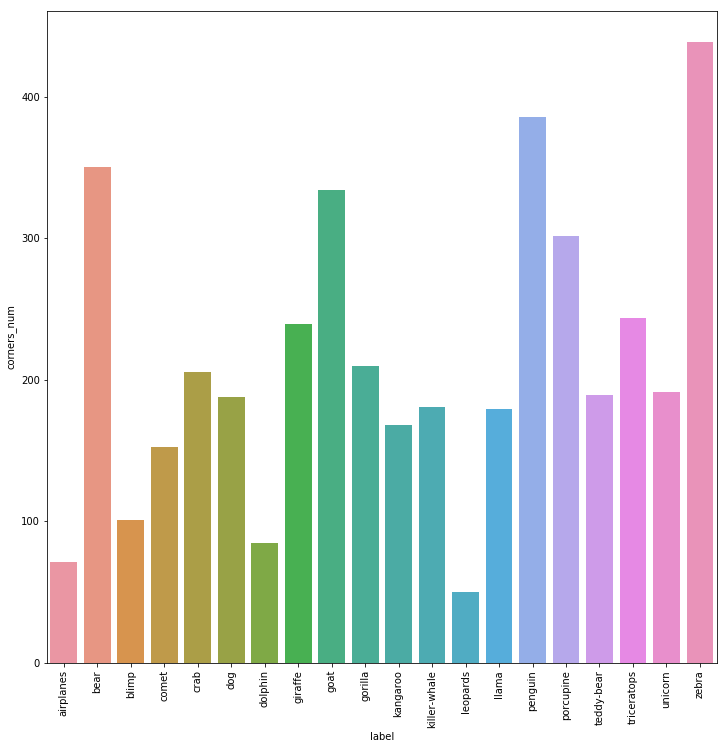

In [27]:
plt.figure(figsize=[12,12])
sns.barplot(x=starting_data.groupby(['label']).mean().reset_index()['label'],
            y=starting_data.groupby(['label']).mean()['corners_num'])
plt.xticks(np.arange(0,20), categories, rotation=90);

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [2]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [3]:
feature_frame(data_from_nb1)

NameError: name 'starting_data' is not defined